In [1]:
import os
from astropy.table import Table, vstack
import numpy as np
from collections import OrderedDict
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
from astropy.table import Table, vstack, Column
from astropy.io import ascii
import scipy, pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits as pyfits

from scipy.optimize import curve_fit

ra,dec,type,brickid,objid,flux_r,flux_g,flux_z,shapeexp_r,apflux_r [8],apflux_g [8],apflux_z [8],shapeexp_e1,shapeexp_e2,psfsize_r,csb,id,ratio,tag
deg,deg,,,,nanomaggy,nanomaggy,nanomaggy,arcsec,nanomaggy,nanomaggy,nanomaggy,,,arcsec,nanomaggy,,,
float64,float64,str4,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str18,float32,str2
191.028373832,9.4905116223,EXP,385642,2050,75.5703,51.8018,97.138,5.78767,1.24013 .. 59.8921,0.759799 .. 41.9833,1.68281 .. 74.9112,0.299948,0.210714,1.45601,22.8665,brick385642_id2050,0.463525,l
190.951726889,9.62620858228,EXP,387063,7,4.33397,4.37913,18.805,23.7612,0.175933 .. 321.262,0.189064 .. 368.918,0.457112 .. 498.534,0.177217,-0.663925,1.41464,23.9199,brick387063_id7,0.185418,s
191.055452483,9.72328725791,EXP,387063,1560,290.051,165.943,400.595,17.3323,0.393809 .. 55.1326,0.195064 .. 32.5134,0.499615 .. 75.9131,-0.139655,-0.0733444,1.40064,24.0483,brick387063_id1560,0.727499,lg
191.110298532,9.85795382269,EXP,387063,3839,6.21865,3.00732,12.1122,9.00383,0.305057 .. 106.605,0.112822 .. 35.257,0.641561 .. 210.249,0.387841,0.574083,1.22929,24.4501,brick387063_id3839,0.181464,s
190.981726694,10.6117563685,EXP,391320,4513,49.1212,28.269,69.4795,7.8387,0.547143 .. 28.9159,0.312871 .. 16.7299,0.68774 .. 40.5038,-0.2108,0.0557095,1.4442,24.1519,brick391320_id4513,0.641986,lg
190.963159797,11.0462319905,EXP,394153,3289,20.9413,18.5698,29.623,5.2931,0.511645 .. 164.295,0.262914 .. 110.378,1.14023 .. 244.934,-0.097715,-0.279017,1.3455,22.9342,brick394153_id3289,0.543647,d
191.172855393,11.5203416278,EXP,396981,2492,120.176,64.7842,177.879,13.4775,0.507685 .. 39.2328,0.25784 .. 21.0173,0.671261 .. 58.1767,-0.209745,0.179979,1.36008,24.0728,brick396981_id2492,0.566933,lg
191.220397857,11.5590381883,EXP,396981,3359,26.2957,14.9376,36.5106,8.39524,0.205621 .. 15.799,0.095287 .. 8.98273,0.245284 .. 21.1597,0.155002,-0.126035,1.26612,24.9278,brick396981_id3359,0.666978,lg


In [71]:
t = Table.read('twotractors.fits')

In [85]:
best = t['tag'] == 'lg'
lsb = t['tag'] == 'l'
lsbgs = t[best | lsb]
lsbgs;

ellip = 1 - lsbgs['ratio']

In [196]:
from IPython import display
low,med,hi = np.percentile(lsbgs['shapeexp_r'], [16,50,84])

print(low, med, hi)
print(np.mean(lsbgs['shapeexp_r']))


5.40329124451 6.6111934185 10.8452096939
8.3529


In [186]:
output = t[lsb].copy()

output['ellip'] = 1-output['ratio']

output.rename_column('csb_g', 'csb')
#output.rename_column('ratio', 'ellip')
output['id', 'ra', 'dec', 'type', 'shapeexp_r', 'csb', 'ellip' ].write('lsbg-ell.fits', overwrite=True)

In [131]:
len(ellip)

230

In [87]:
gauss = 1 - lsbgs['ratio']

n_samples = 1000
idx = np.arange(len(gauss))

mu = []
stddev = []

for count in range(100000):
    rand_i = np.random.choice(idx, size=n_samples, replace=True)
    mu.append(np.mean(gauss[rand_i]))
    stddev.append(np.std(gauss[rand_i]))
    
mu = np.array(mu)
stddev = np.array(stddev)

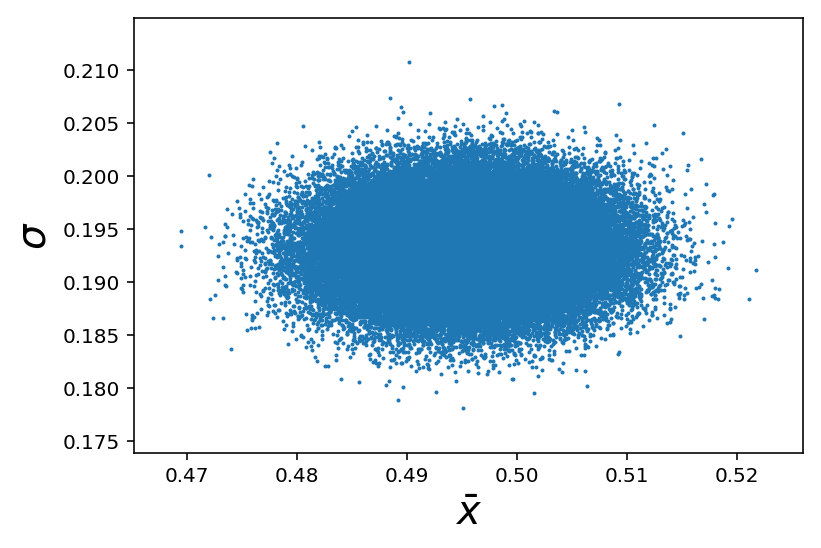

In [148]:
plt.scatter(mu, stddev, s=1)
plt.xlabel(r'$\bar{x}$', fontsize=20)
plt.ylabel(r'$\sigma$', fontsize=20)

plt.savefig("/u/tmakinen/Documents/JP-1/plots/params.png", 
                                    dpi='figure', bbox_inches='tight', overwrite=True)

In [118]:
print(np.mean(mu), np.mean(stddev))

hi = np.percentile(stddev, 50)

print(hi)

0.49545 0.193362
0.19336014986


In [202]:
low,med,hi = np.percentile(stddev, [16, 50, 84])
upper, lower = hi-med, med-low
print(med, upper, lower)

0.19336014986 0.00331063508987 0.00330143094063


In [203]:
low,med,hi = np.percentile(mu, [16, 50, 84])
upper, lower = hi-med, med-low
print(med, upper, lower)

0.495465740561 0.00610653460026 0.00615080654621


In [207]:
np.mean(1 - lsbgs['ratio']), np.std(1 - lsbgs['ratio'])/np.sqrt(len(lsbgs))

(0.49545342, 0.012757570573474901)

In [209]:
from IPython import display

test = stddev, mu
pars = np.stack(test, axis=1)

low,med,hi = np.percentile(pars, [16, 50, 84], axis=0)
upper, lower = hi-med, med-low

disp_str1 = ""
for i,name in enumerate(['\sigma', '\mu_']):
        fmt_str = '{name}={val:.4f}^{{+{plus:.4f}}}_{{-{minus:.4f}}}'
        disp_str1 += fmt_str.format(name=name, val=med[i], plus=upper[i], minus=lower[i])
        disp_str1 += r'\quad '

disp_str1 = "${}$".format(disp_str1)
display.Latex(data=disp_str1)



<IPython.core.display.Latex object>

In [210]:
hi

array([ 0.19667078,  0.50157228])

/u/tmakinen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


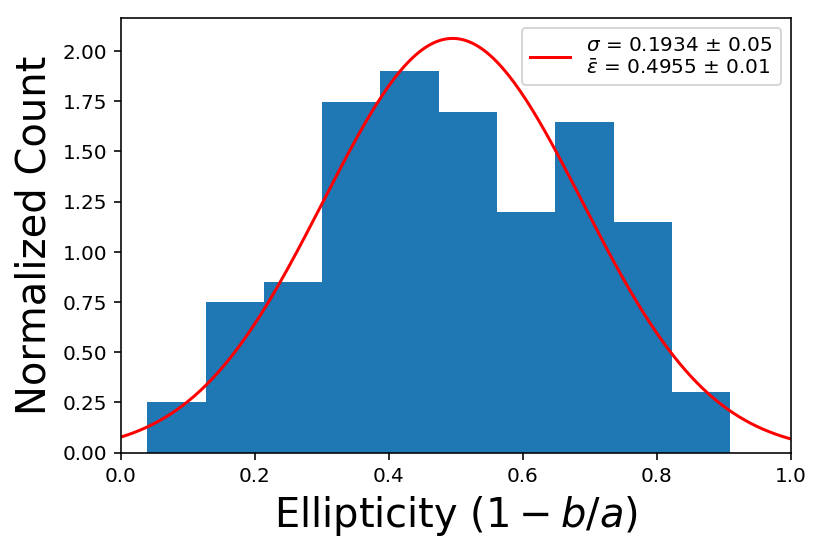

In [221]:
plt.hist(ellip, normed=True)

x = np.linspace(-1, 1.5, 560)
ymed = gauss(x, med[0], med[1])

#yup = gauss(x, .2434, med[1])

#ylow = gauss(x, low[0], med[1])

plt.xlim(0, 1)

plt.plot(x,ymed, color='r', label='$\sigma$ = 0.1934 $\pm$ 0.05' + '\n'+r'$\bar{\epsilon}$ = 0.4955 $\pm$ 0.01', c='g')
#plt.plot(x, yup, label='$\sigma$ $84^{th}$ Percentile')
#plt.plot(x, ylow, label='$\sigma$ $16^{th}$ Percentile')
plt.xlabel('Ellipticity $(1-b/a)$', fontsize=20)
plt.ylabel('Normalized Count', fontsize=20)
plt.legend(loc='best')

plt.savefig("/u/tmakinen/Documents/JP-1/plots/lsbg-ellip", 
                                    dpi='figure', bbox_inches='tight', overwrite=True)

18.8423 20.7856550217


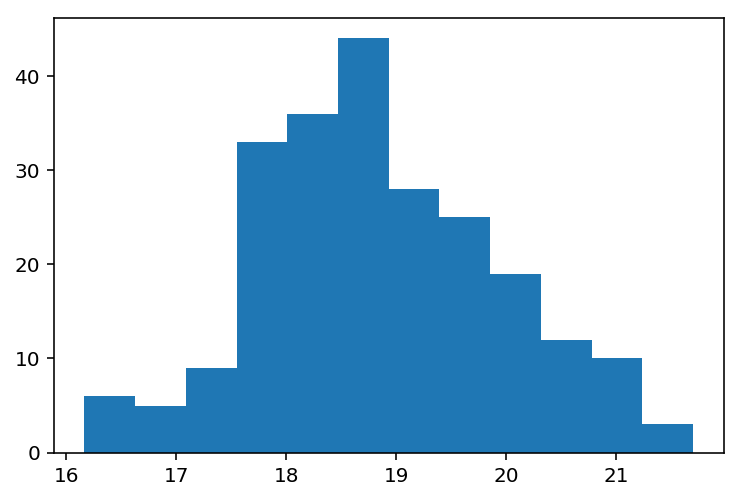

In [236]:
plt.hist(22.5-2.5*np.log10(lsbgs['flux_g']), bins='auto')

print(np.mean(22.5-2.5*np.log10(lsbgs['flux_g'])), np.percentile(22.5-2.5*np.log10(lsbgs['flux_g']), 95))

0.457198 0.678865337372


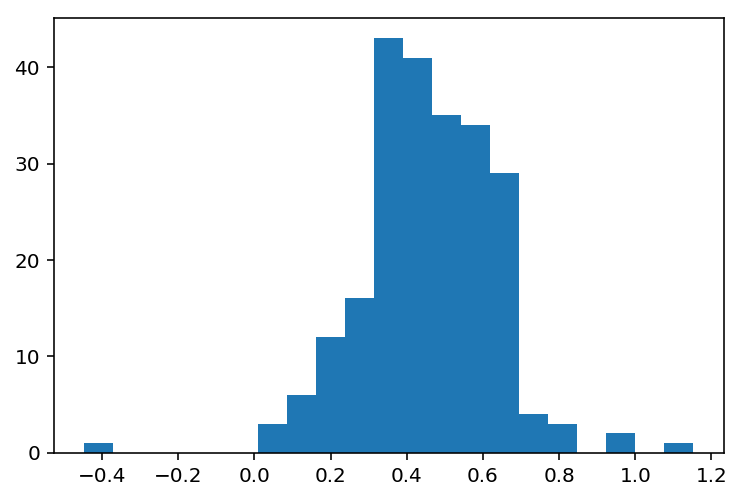

In [239]:
mag_r = 22.5 - 2.5*np.log10(lsbgs['flux_r'])
mag_g = 22.5 - 2.5*np.log10(lsbgs['flux_g'])
mag_z = 22.5 - 2.5*np.log10(lsbgs['flux_z'])
mag_gr = mag_g - mag_r

plt.hist(mag_gr, bins='auto')

print(np.mean(mag_gr), np.percentile((mag_gr), 95))


In [92]:
def gauss(x, sigma, mu):
    return (1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*(sigma**2))))

In [25]:
x = 1 - lsbgs['ratio']
sigma = np.std(x)
sigma

0.20330158

(array([ 0.15180738,  0.48578361,  0.57686803,  0.72867541,  1.12337459,
         1.30554344,  1.39662787,  1.91277295,  2.30747213,  1.3662664 ,
         0.72867541]),
 array([ 0.07783377,  0.16058874,  0.2433437 ,  0.32609866,  0.40885363,
         0.49160859,  0.57436356,  0.65711852,  0.73987349,  0.82262845,
         0.90538341,  0.98813838]),
 <a list of 11 Patch objects>)

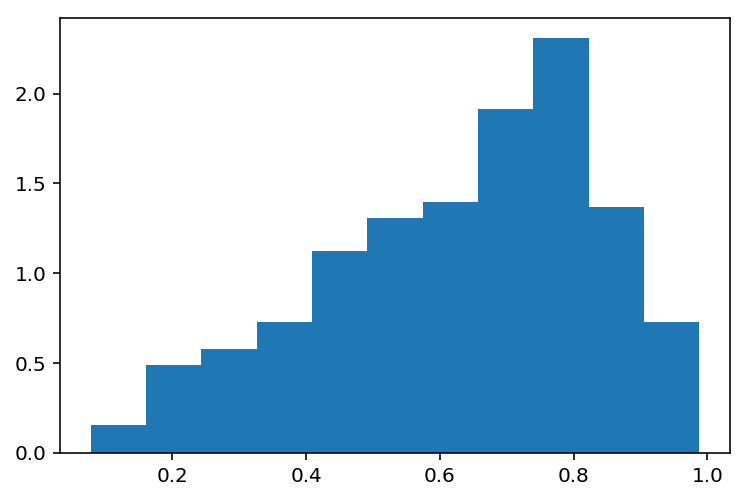

In [28]:
counts = np.histogram(x, density=True)
counts
plt.hist(x, normed=True, bins='auto')

In [68]:
counts, bin_edges = np.histogram(x, bins='auto')

center = bin_edges + ((bin_edges[2] - bin_edges[1])/2)

center_x = center[:11]

In [70]:
ntrials = 10000       # number of times we want to sample data within th error bands and fit model parameters

p0 = [0., 2]

x = 1 - lsbgs['ratio']

counts, bin_edges = np.histogram(x, bins='auto')
sigma = np.sqrt(counts)         # standard deviation of each y point (bin top) is the square-root of the 
                                # counts in that bin
# for the gauss function
y_data = np.zeros(len(counts))
x_data = center_x
    
pararray = []
pararray1 = np.asarray(pararray)


pararray = []
pararray1 = np.asarray(pararray)

y_data = np.zeros(len(counts))

pars = []

for i in range(ntrials):
    for j in range(len(counts)):
        mu = counts[j]        
        
        y_data[j] = mu + np.random.normal(0, sigma[j], 1)  # generate random distribution with sigma = sqrt(n things in bin)
                                                        # about each y data point since each count in each bin occurs
                                                        # according to a poisson distribution

    popt, pcov = curve_fit(gauss, x_data, y_data)
    pararray1 = np.append(pararray1, popt)
    pars.append(popt)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

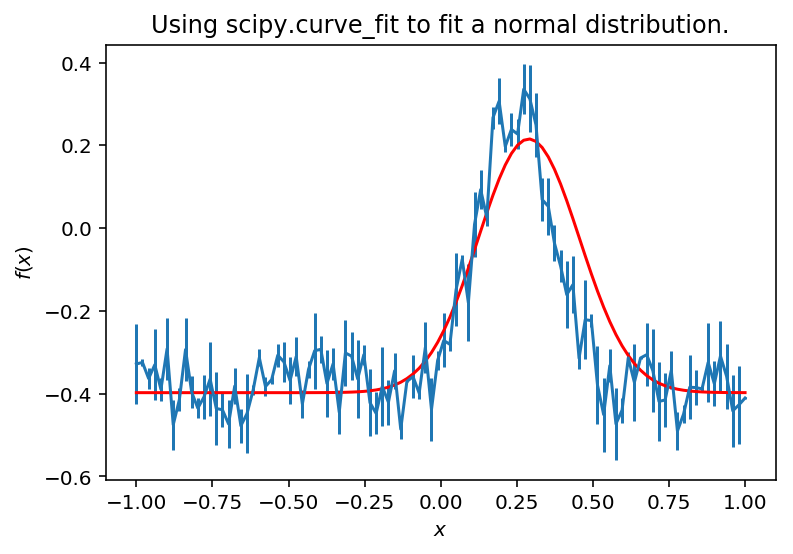

In [14]:
import random

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
	a, b, c, d = p
	y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

	return y

# Choose some starting params for our distribution and perturb them
# using random numbers.
p_initial = [1.0, 0.0, 0.1, 0.0]
p_perturbed = [i + 0.5*(random.random()*2 - 1.) for i in p_initial]

N = 100 # Number of data points.

# Create our data sets. Perturb the y-data with randomness and
# generate completely random data for the errors.
x = np.linspace(-1, 1, N)
y = np.array([gauss(i, *p_perturbed) + 0.1*(random.random()*2. - 1.) for i in x])
e = np.array([random.random()*0.1 for _ in y])

# Use curve_fit to fit the gauss function to our data. Use the
# unperturbed p_initial as our initial guess.
popt, pcov = curve_fit(gauss, x, y, p0=p_initial, sigma=e)

# Generate y-data based on the fit.
y_fit = gauss(x, *popt)

# Create a plot of our work, showing both the data and the fit.
fig, ax = plt.subplots()

ax.errorbar(x,y,e)
ax.plot(x, y_fit, color = 'red')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('Using scipy.curve_fit to fit a normal distribution.')

plt.show()